## Imports

In [1]:
import cv2
import pandas
import numpy
import matplotlib.pyplot as pyplot
import tensorflow
import keras
import pickle
from sklearn.metrics import confusion_matrix,classification_report
import seaborn

In [68]:
from keras.utils.vis_utils import plot_model


In [2]:
pickle_Training_features=open("../Data/Data_Object/Training_Objects/Pickle_Training_features.pickle","rb")
Training_features=pickle.load(pickle_Training_features)
pickle_Training_features.close()
pickle_Training_labels=open("../Data/Data_Object/Training_Objects/Pickle_Training_labels.pickle","rb")
Training_Labels=pickle.load(pickle_Training_labels)
pickle_Training_labels.close()

In [3]:
pickle_Testing_features=open("../Data/Data_Object/Testing_Objects/Pickle_Testing_features.pickle","rb")
Testing_features=pickle.load(pickle_Testing_features)
pickle_Testing_features.close()
pickle_Testing_labels=open("../Data/Data_Object/Testing_Objects/Pickle_Testing_labels.pickle","rb")
Testing_Labels=pickle.load(pickle_Testing_labels)
pickle_Testing_labels.close()

In [83]:
Training_features

[array([[[0.28235294, 0.43921569, 0.41568627],
         [0.09803922, 0.19607843, 0.24705882],
         [0.19607843, 0.28627451, 0.29411765],
         ...,
         [0.00392157, 0.08235294, 0.0627451 ],
         [0.        , 0.07058824, 0.05098039],
         [0.01568627, 0.05882353, 0.0745098 ]],
 
        [[0.2627451 , 0.41960784, 0.39607843],
         [0.1254902 , 0.22352941, 0.2745098 ],
         [0.20392157, 0.29411765, 0.30196078],
         ...,
         [0.01568627, 0.10588235, 0.08627451],
         [0.00392157, 0.10196078, 0.08235294],
         [0.03137255, 0.08235294, 0.09019608]],
 
        [[0.32156863, 0.47843137, 0.45490196],
         [0.13333333, 0.23137255, 0.28235294],
         [0.14117647, 0.23137255, 0.23921569],
         ...,
         [0.02352941, 0.1254902 , 0.10196078],
         [0.01568627, 0.1254902 , 0.10196078],
         [0.02745098, 0.10588235, 0.09411765]],
 
        ...,
 
        [[0.10588235, 0.30196078, 0.23529412],
         [0.09411765, 0.29019608, 0.21960

In [84]:
Training_Labels

[0,
 2,
 3,
 3,
 2,
 1,
 4,
 3,
 2,
 3,
 3,
 1,
 4,
 0,
 0,
 3,
 1,
 2,
 1,
 4,
 1,
 1,
 3,
 0,
 0,
 4,
 3,
 4,
 0,
 0,
 1,
 0,
 4,
 1,
 4,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 2,
 4,
 0,
 3,
 2,
 3,
 4,
 4,
 1,
 2,
 3,
 3,
 4,
 4,
 0,
 1,
 1,
 3,
 3,
 2,
 3,
 0,
 4,
 2,
 2,
 2,
 0,
 2,
 2,
 4,
 0,
 3,
 2,
 0,
 3,
 2,
 1,
 2,
 0,
 1,
 3,
 1,
 2,
 0,
 2,
 0,
 4,
 3,
 1,
 1,
 2,
 0,
 3,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 4,
 1,
 1,
 4,
 1,
 0,
 1,
 1,
 0,
 4,
 0,
 3,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 4,
 3,
 1,
 4,
 0,
 0,
 4,
 4,
 1,
 1,
 0,
 3,
 0,
 1,
 4,
 3,
 2,
 3,
 4,
 3,
 4,
 0,
 4,
 4,
 4,
 1,
 0,
 0,
 4,
 4,
 3,
 1,
 0,
 4,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 4,
 1,
 4,
 3,
 2,
 1,
 3,
 4,
 1,
 4,
 4,
 1,
 3,
 4,
 2,
 2,
 0,
 3,
 3,
 4,
 2,
 4,
 3,
 0,
 0,
 0,
 1,
 3,
 2,
 1,
 0,
 0,
 4,
 3,
 3,
 2,
 1,
 0,
 4,
 4,
 3,
 2,
 2,
 2,
 3,
 0,
 3,
 1,
 1,
 1,
 4,
 3,
 0,
 0,
 2,
 0,
 1,
 3,
 3,
 3,
 2,
 2,
 4,
 0,
 0,
 4,
 3,
 4,
 0,
 4,
 4,
 0,
 3,
 0,
 4,
 4,
 4,


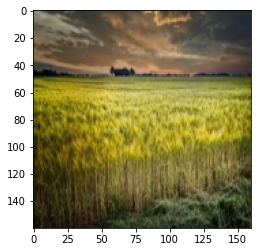

In [43]:
pyplot.imshow(Testing_features[0])

## Praparing Data for training

In [10]:
Training_features=numpy.array(Training_features)

In [11]:
Training_features.shape

(548, 160, 160, 3)

In [12]:
Testing_features=numpy.array(Testing_features)

In [13]:
Testing_features.shape

(130, 160, 160, 3)

In [14]:
Training_features[0].shape

(160, 160, 3)

In [70]:
Training_features=numpy.expand_dims(Training_features,axis=-1)
Testing_features=numpy.expand_dims(Testing_features,axis=-1)

In [15]:
Training_features.shape

(548, 160, 160, 3)

In [16]:
Testing_features.shape

(130, 160, 160, 3)

# Model Definition

In [151]:
# Simple_Model_1=keras.models.Sequential(
# [
#     keras.layers.Conv2D(filters=64,kernel_size=2,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,1]),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(units=512,activation='relu'),
#     keras.layers.Dense(units=64,activation='relu'),
#     keras.layers.Dense(units=5,activation='softmax')
# ]
# )

# Simple_Model_1=keras.models.Sequential(
# [
#     keras.layers.Conv2D(filters=64,kernel_size=2,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,3]),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(units=512,activation='relu'),
#     keras.layers.Dense(units=64,activation='relu'),
#     keras.layers.Dense(units=5,activation='softmax')
# ]
# )


# Simple_Model_1=keras.models.Sequential(
#      [
#          keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,3]),
#          keras.layers.MaxPool2D(pool_size=(2,2)),
#          keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,3]),
#          keras.layers.MaxPool2D(pool_size=(2,2)),
#          keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,3]),
#          keras.layers.MaxPool2D(pool_size=(2,2)),
#          keras.layers.Conv2D(filters=16,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,3]),
#          keras.layers.MaxPool2D(pool_size=(2,2)),
#          keras.layers.Flatten(),
#          keras.layers.Dense(units=512,activation='relu'),
#          keras.layers.Dense(units=256,activation='relu'),
#          keras.layers.Dense(units=64,activation='relu'),
#          keras.layers.Dense(units=5,activation='softmax'),
#      ]
#  )


Simple_Model_1=keras.models.Sequential([
         keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[160,160,3]),
         keras.layers.MaxPooling2D(pool_size=(2,2)),
         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
         keras.layers.MaxPooling2D(pool_size=(2,2)),
         keras.layers.Conv2D(filters=16, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
         keras.layers.MaxPooling2D(pool_size=(2,2)),
         keras.layers.Flatten(),
         keras.layers.Dense(units=512, activation='relu'),
         keras.layers.Dense(units=256, activation='relu'),
         keras.layers.Dropout(0.15),
         keras.layers.Dense(units=256, activation='relu'),
         keras.layers.Dropout(0.10),                         
         keras.layers.Dense(units=64, activation='relu'),
         keras.layers.Dense(units=5, activation='softmax')
    ]
 )

In [152]:
Simple_Model_1

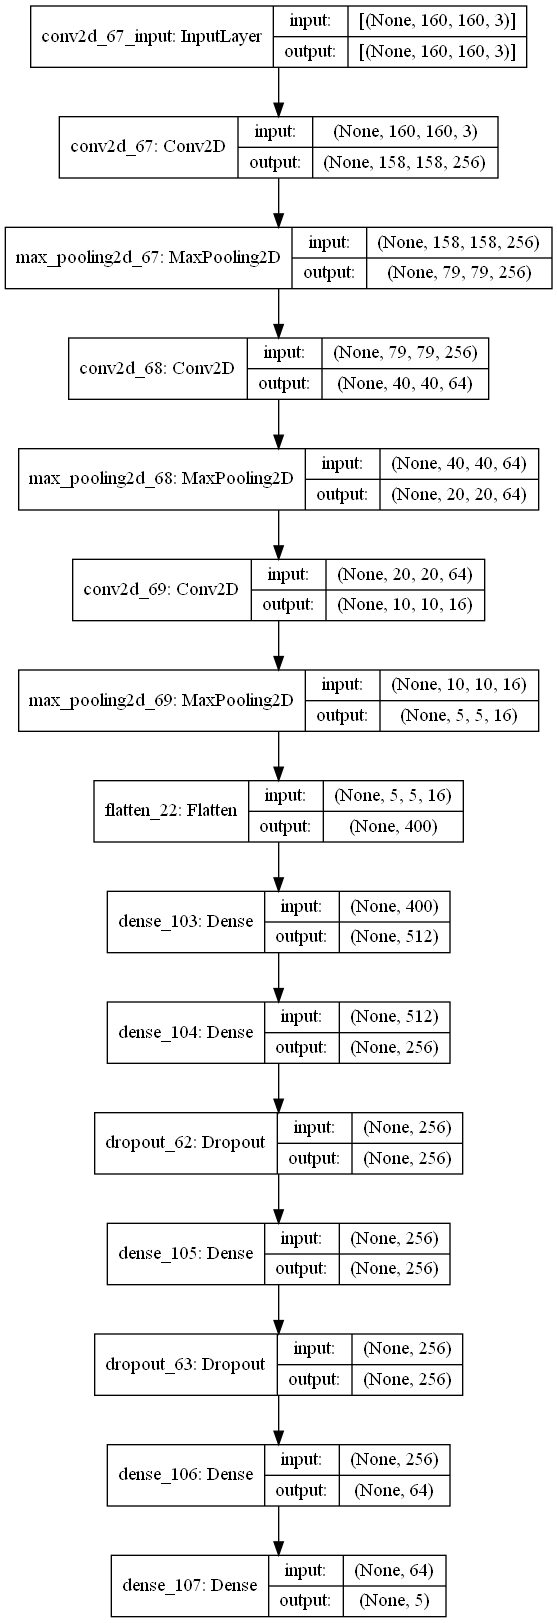

In [153]:
plot_model(Simple_Model_1, to_file='model_plot5.png', show_shapes=True, show_layer_names=True)

In [154]:
Simple_Model_1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 158, 158, 256)     7168      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 79, 79, 256)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 40, 40, 64)        147520    
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 10, 10, 16)        9232      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 400)             

In [155]:
Simple_Model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy','sparse_categorical_crossentropy'])

In [157]:
Simple_Model_1.fit(Training_features,numpy.array(Training_Labels),epochs=50,verbose=1,validation_data=(Testing_features,numpy.array(Testing_Labels)))

Epoch 1/50
18/18 [==============================] - 52s 3s/step - loss: 1.6095 - accuracy: 0.2318 - sparse_categorical_crossentropy: 1.6095 - val_loss: 1.6032 - val_accuracy: 0.1923 - val_sparse_categorical_crossentropy: 1.6032
Epoch 2/50
18/18 [==============================] - 47s 3s/step - loss: 1.5740 - accuracy: 0.2883 - sparse_categorical_crossentropy: 1.5740 - val_loss: 1.7173 - val_accuracy: 0.1923 - val_sparse_categorical_crossentropy: 1.7173
Epoch 3/50
18/18 [==============================] - 51s 3s/step - loss: 1.6330 - accuracy: 0.2245 - sparse_categorical_crossentropy: 1.6330 - val_loss: 1.6059 - val_accuracy: 0.2308 - val_sparse_categorical_crossentropy: 1.6059
Epoch 4/50
18/18 [==============================] - 48s 3s/step - loss: 1.6100 - accuracy: 0.2354 - sparse_categorical_crossentropy: 1.6100 - val_loss: 1.6070 - val_accuracy: 0.2308 - val_sparse_categorical_crossentropy: 1.6070
Epoch 5/50
18/18 [==============================] - 46s 3s/step - loss: 1.6068 - accurac

Epoch 37/50
18/18 [==============================] - 45s 2s/step - loss: 0.1608 - accuracy: 0.9416 - sparse_categorical_crossentropy: 0.1608 - val_loss: 2.6222 - val_accuracy: 0.4308 - val_sparse_categorical_crossentropy: 2.6222
Epoch 38/50
18/18 [==============================] - 44s 2s/step - loss: 0.2614 - accuracy: 0.9161 - sparse_categorical_crossentropy: 0.2614 - val_loss: 2.6705 - val_accuracy: 0.4846 - val_sparse_categorical_crossentropy: 2.6705
Epoch 39/50
18/18 [==============================] - 45s 2s/step - loss: 0.1556 - accuracy: 0.9434 - sparse_categorical_crossentropy: 0.1556 - val_loss: 2.1497 - val_accuracy: 0.4769 - val_sparse_categorical_crossentropy: 2.1497
Epoch 40/50
18/18 [==============================] - 45s 3s/step - loss: 0.0770 - accuracy: 0.9799 - sparse_categorical_crossentropy: 0.0770 - val_loss: 2.5618 - val_accuracy: 0.4615 - val_sparse_categorical_crossentropy: 2.5618
Epoch 41/50
18/18 [==============================] - 46s 3s/step - loss: 0.0505 - ac

In [89]:
# Simple_Model_1.save("../Models/Simple_Model_5_colored_For_Crop_Detection.h5") 

## prediction

In [94]:
model=tensorflow.keras.models.load_model('../Models/Simple_Model_4_colored_For_Crop_Detection.h5')

In [95]:
Predictions=model.predict(Testing_features)

In [97]:
Predictions[50]

array([1.09505905e-04, 7.19144568e-02, 8.35500598e-01, 3.64517182e-05,
       9.24390256e-02], dtype=float32)

In [98]:
max(Predictions[50])

0.8355006

In [99]:
Training_Labels[50]

1

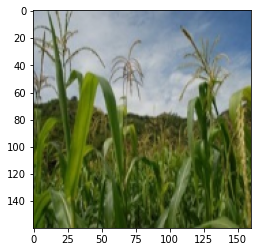

In [100]:
pyplot.imshow(Training_features[50],cmap='gray')

In [101]:
class_list=[
    "Cotton",
    "Maize",
    "Rice",
    "Sugarcane",
    "Wheat"
]

In [141]:
testing_image=cv2.imread("./cotton.jpg")
testing_image=cv2.resize(testing_image,(160,160))
testing_image=testing_image/255

In [142]:
testing_image

array([[[0.70196078, 0.61960784, 0.58823529],
        [0.70588235, 0.61960784, 0.6       ],
        [0.74509804, 0.65098039, 0.60392157],
        ...,
        [0.63921569, 0.74509804, 0.89019608],
        [0.61960784, 0.7254902 , 0.87058824],
        [0.59607843, 0.70980392, 0.85490196]],

       [[0.72156863, 0.63529412, 0.59215686],
        [0.7254902 , 0.63137255, 0.60392157],
        [0.74901961, 0.65490196, 0.60784314],
        ...,
        [0.63137255, 0.73333333, 0.87843137],
        [0.62352941, 0.72941176, 0.8745098 ],
        [0.6       , 0.71372549, 0.85882353]],

       [[0.74509804, 0.65098039, 0.60392157],
        [0.74901961, 0.65098039, 0.61176471],
        [0.76078431, 0.66666667, 0.61960784],
        ...,
        [0.64313725, 0.74117647, 0.8745098 ],
        [0.61960784, 0.7254902 , 0.87058824],
        [0.59607843, 0.70980392, 0.85490196]],

       ...,

       [[0.12156863, 0.2       , 0.20392157],
        [0.1372549 , 0.21960784, 0.22352941],
        [0.1254902 , 0

In [143]:
testing_image=numpy.array([testing_image])

In [144]:
testing_image.shape

(1, 160, 160, 3)

In [145]:
# testing_image=numpy.expand_dims(testing_image,axis=-1)

In [146]:
predicted_crop=Simple_Model_1.predict(testing_image)[0]

In [148]:
predicted_crop

array([0.19819051, 0.20197338, 0.20134984, 0.20074913, 0.19773713],
      dtype=float32)

In [149]:
def getClass(array):
    index=0
    max_=max(array)
    for i in range(len(array)):
        if array[i]==max_:
            index=i
#     print(class_list[index])
    return class_list[index]

In [150]:
getClass(predicted_crop)

'Maize'

In [133]:
Training_predictions=[]
Training_Labels_value=[]
for i in range(len(Predictions)):
    Training_predictions.append(getClass(Predictions[i]))
    Training_Labels_value.append(class_list[Training_Labels[i]])

In [179]:
Training_predictions

['Wheat',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Wheat',
 'Cotton',
 'Maize',
 'Cotton',
 'Wheat',
 'Sugarcane',
 'Sugarcane',
 'Rice',
 'Cotton',
 'Wheat',
 'Wheat',
 'Rice',
 'Cotton',
 'Rice',
 'Cotton',
 'Wheat',
 'Wheat',
 'Maize',
 'Maize',
 'Rice',
 'Wheat',
 'Cotton',
 'Rice',
 'Cotton',
 'Cotton',
 'Maize',
 'Cotton',
 'Maize',
 'Cotton',
 'Sugarcane',
 'Sugarcane',
 'Wheat',
 'Rice',
 'Wheat',
 'Rice',
 'Rice',
 'Sugarcane',
 'Wheat',
 'Maize',
 'Sugarcane',
 'Cotton',
 'Cotton',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Wheat',
 'Maize',
 'Sugarcane',
 'Rice',
 'Cotton',
 'Maize',
 'Cotton',
 'Maize',
 'Sugarcane',
 'Sugarcane',
 'Cotton',
 'Maize',
 'Maize',
 'Maize',
 'Wheat',
 'Wheat',
 'Wheat',
 'Cotton',
 'Wheat',
 'Rice',
 'Wheat',
 'Wheat',
 'Cotton',
 'Sugarcane',
 'Sugarcane',
 'Maize',
 'Wheat',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Rice',
 'Wheat',
 'Rice',
 'Rice',
 'Cotton',
 'Cotton',
 'Cotton',
 'Sugarcane',
 'Co

In [180]:
Training_Labels_value

['Wheat',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Wheat',
 'Cotton',
 'Maize',
 'Cotton',
 'Wheat',
 'Sugarcane',
 'Sugarcane',
 'Rice',
 'Cotton',
 'Wheat',
 'Wheat',
 'Rice',
 'Cotton',
 'Rice',
 'Cotton',
 'Wheat',
 'Wheat',
 'Maize',
 'Maize',
 'Rice',
 'Wheat',
 'Cotton',
 'Rice',
 'Cotton',
 'Cotton',
 'Maize',
 'Cotton',
 'Maize',
 'Cotton',
 'Sugarcane',
 'Sugarcane',
 'Wheat',
 'Rice',
 'Wheat',
 'Rice',
 'Rice',
 'Sugarcane',
 'Wheat',
 'Maize',
 'Sugarcane',
 'Cotton',
 'Cotton',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Wheat',
 'Maize',
 'Sugarcane',
 'Rice',
 'Cotton',
 'Maize',
 'Cotton',
 'Maize',
 'Sugarcane',
 'Sugarcane',
 'Cotton',
 'Maize',
 'Maize',
 'Maize',
 'Wheat',
 'Wheat',
 'Wheat',
 'Cotton',
 'Wheat',
 'Rice',
 'Wheat',
 'Wheat',
 'Cotton',
 'Sugarcane',
 'Sugarcane',
 'Maize',
 'Wheat',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Rice',
 'Wheat',
 'Rice',
 'Rice',
 'Cotton',
 'Cotton',
 'Cotton',
 'Sugarcane',
 'Co

In [134]:
print("Actual values --> Predicted values",)
for i in range(len(Predictions)):
    print(Training_Labels_value[i],"  ->  ",Training_predictions[i])

Actual values --> Predicted values
Maize   ->   Rice
Wheat   ->   Rice
Rice   ->   Rice
Cotton   ->   Wheat
Wheat   ->   Wheat
Rice   ->   Maize
Sugarcane   ->   Rice
Maize   ->   Wheat
Maize   ->   Cotton
Sugarcane   ->   Cotton
Wheat   ->   Cotton
Rice   ->   Sugarcane
Rice   ->   Rice
Wheat   ->   Wheat
Wheat   ->   Maize
Maize   ->   Wheat
Sugarcane   ->   Sugarcane
Cotton   ->   Rice
Rice   ->   Rice
Cotton   ->   Rice
Sugarcane   ->   Rice
Sugarcane   ->   Rice
Maize   ->   Rice
Cotton   ->   Cotton
Sugarcane   ->   Wheat
Wheat   ->   Rice
Rice   ->   Sugarcane
Sugarcane   ->   Wheat
Rice   ->   Cotton
Sugarcane   ->   Cotton
Wheat   ->   Rice
Rice   ->   Rice
Maize   ->   Cotton
Sugarcane   ->   Sugarcane
Sugarcane   ->   Rice
Cotton   ->   Cotton
Maize   ->   Cotton
Cotton   ->   Rice
Rice   ->   Sugarcane
Sugarcane   ->   Cotton
Wheat   ->   Maize
Cotton   ->   Maize
Sugarcane   ->   Cotton
Wheat   ->   Wheat
Wheat   ->   Wheat
Maize   ->   Rice
Wheat   ->   Rice
Cotton   ->  

In [135]:

Testing_predictions=[]
Testing_Labels_value=[]
for i in range(len(Predictions)):
    Testing_predictions.append(getClass(Predictions[i]))
    Testing_Labels_value.append(class_list[Testing_Labels[i]])



In [136]:
print("Actual values --> Predicted values",)
for i in range(len(Predictions)):
    print(Testing_Labels_value[i],"  ->  ",Testing_predictions[i])

Actual values --> Predicted values
Wheat   ->   Rice
Rice   ->   Rice
Rice   ->   Rice
Sugarcane   ->   Wheat
Wheat   ->   Wheat
Maize   ->   Maize
Rice   ->   Rice
Wheat   ->   Wheat
Wheat   ->   Cotton
Cotton   ->   Cotton
Cotton   ->   Cotton
Cotton   ->   Sugarcane
Rice   ->   Rice
Wheat   ->   Wheat
Maize   ->   Maize
Rice   ->   Wheat
Maize   ->   Sugarcane
Rice   ->   Rice
Wheat   ->   Rice
Sugarcane   ->   Rice
Rice   ->   Rice
Wheat   ->   Rice
Wheat   ->   Rice
Cotton   ->   Cotton
Cotton   ->   Wheat
Rice   ->   Rice
Sugarcane   ->   Sugarcane
Cotton   ->   Wheat
Cotton   ->   Cotton
Maize   ->   Cotton
Rice   ->   Rice
Wheat   ->   Rice
Rice   ->   Cotton
Sugarcane   ->   Sugarcane
Rice   ->   Rice
Cotton   ->   Cotton
Cotton   ->   Cotton
Rice   ->   Rice
Sugarcane   ->   Sugarcane
Cotton   ->   Cotton
Maize   ->   Maize
Cotton   ->   Maize
Cotton   ->   Cotton
Sugarcane   ->   Wheat
Rice   ->   Wheat
Rice   ->   Rice
Rice   ->   Rice
Sugarcane   ->   Sugarcane
Maize   -> 

In [138]:
confusion_matrix(Testing_Labels_value,Testing_predictions)

array([[24,  1,  0,  1,  4],
       [ 3, 13,  3,  2,  4],
       [ 1,  1, 19,  1,  3],
       [ 2,  1,  2, 13,  7],
       [ 1,  2, 10,  1, 11]], dtype=int64)

<AxesSubplot:>

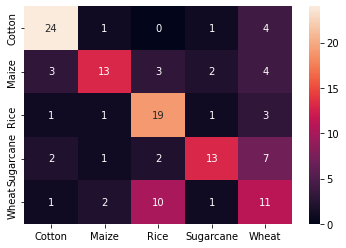

In [139]:
seaborn.heatmap(confusion_matrix(Testing_Labels_value,Testing_predictions),annot=True,xticklabels=class_list,yticklabels=class_list)

In [140]:
print(classification_report(Testing_Labels_value,Testing_predictions))

              precision    recall  f1-score   support

      Cotton       0.77      0.80      0.79        30
       Maize       0.72      0.52      0.60        25
        Rice       0.56      0.76      0.64        25
   Sugarcane       0.72      0.52      0.60        25
       Wheat       0.38      0.44      0.41        25

    accuracy                           0.62       130
   macro avg       0.63      0.61      0.61       130
weighted avg       0.64      0.62      0.62       130

